In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Grid view.csv')

In [3]:
columns_to_keep = {
    'Position': 'position',
    'Employment status': 'status',
    'Seniority level': 'level',
    'Annual Brutto salary without bonus and stocks in EUR': 'base',
    'Annual Brutto salary with bonus and stocks in EUR': 'total',
}

df.drop(columns=df.columns.difference(columns_to_keep.keys()), axis=1, inplace=True)
df.rename(columns=columns_to_keep, inplace=True)

In [4]:
df = df[(df['status'] == 'Full-time employee')]  # remove students, freelancers, etc.

In [5]:
df.head(10).transpose()

,0,1,2,4,5,6,7,8,9,10
status,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee
position,Other,Software Engineer,Data Scientist,Data Scientist,Data Scientist,Software Engineer,DevOps,Software Engineer,Software Engineer,Tech Lead / Team Lead
level,Senior,Senior,Middle,Middle,Senior,Senior,Middle,Lead,Lead,Lead
base,74000.0,65000.0,52000.0,70000.0,88000.0,80000.0,84000.0,80000.0,76000.0,95000.0
total,84000.0,75000.0,52000.0,70000.0,88000.0,88000.0,98000.0,2000.0,78000.0,153000.0


In [6]:
# fix: sometimes total is obviously just a bonus (e.g. N 8 above, base - 80_000, bonus - 2_000)
df.loc[df['total'] < df['base'], 'total'] = df['total'] + df['base']

In [7]:
# drop rows with some missing columns
df = df.dropna()

In [8]:
df.head(10).transpose()

,0,1,2,4,5,6,7,8,9,10
status,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee,Full-time employee
position,Other,Software Engineer,Data Scientist,Data Scientist,Data Scientist,Software Engineer,DevOps,Software Engineer,Software Engineer,Tech Lead / Team Lead
level,Senior,Senior,Middle,Middle,Senior,Senior,Middle,Lead,Lead,Lead
base,74000.0,65000.0,52000.0,70000.0,88000.0,80000.0,84000.0,80000.0,76000.0,95000.0
total,84000.0,75000.0,52000.0,70000.0,88000.0,88000.0,98000.0,82000.0,78000.0,153000.0


In [9]:
# group by position
dict_positions = {k: v for k, v in df.groupby('position')}

In [10]:
# remove anomalies in groups
for k, v in dict_positions.items():
    q01 = v["total"].quantile(0.05)
    q99 = v["total"].quantile(0.99)
    v = v[v["total"] < q99]
    v = v[v["total"] > q01]
    
    dict_positions[k] = v

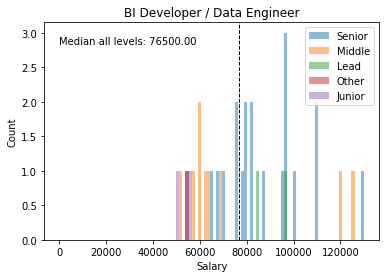

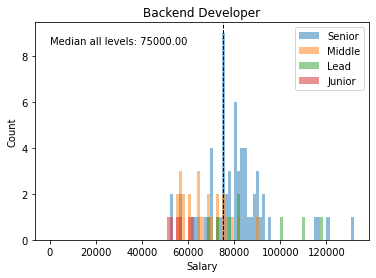

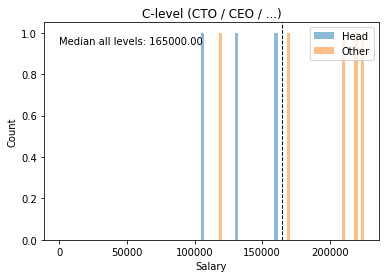

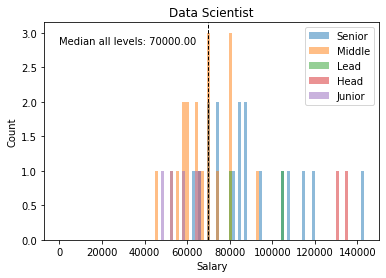

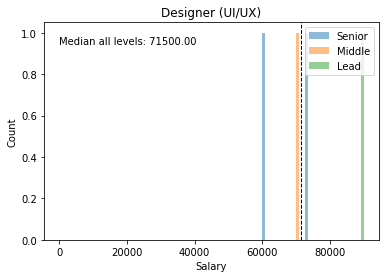

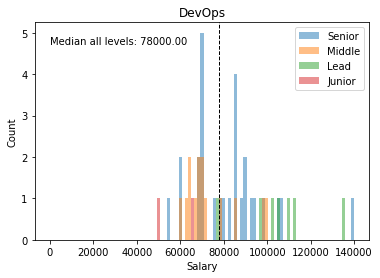

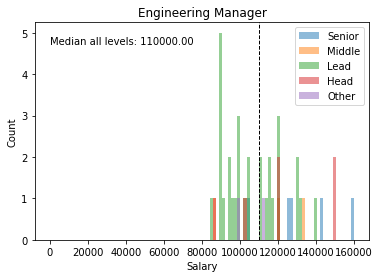

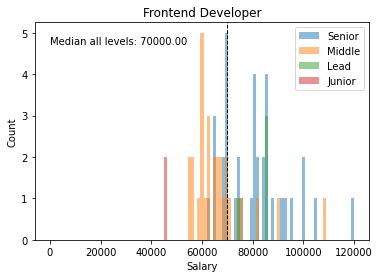

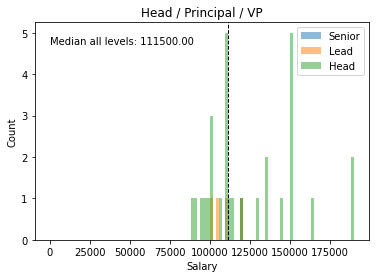

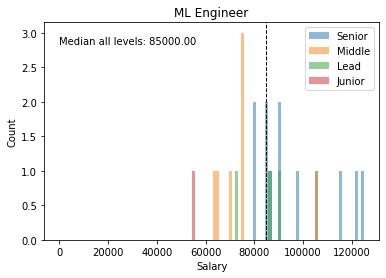

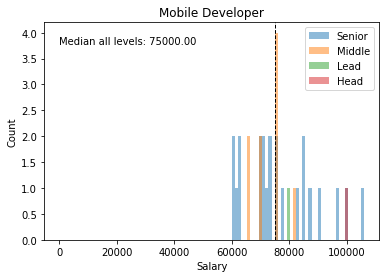

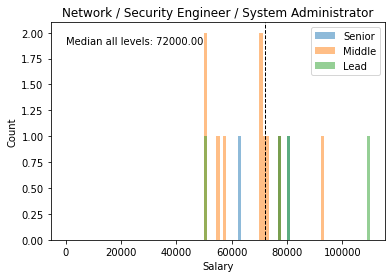

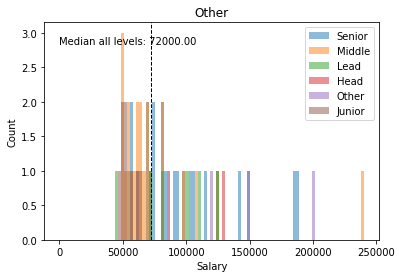

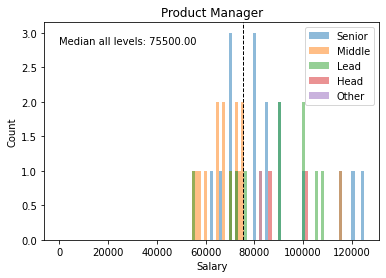

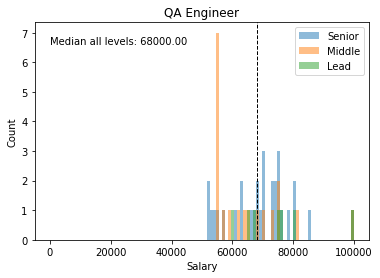

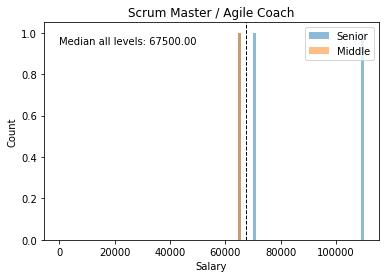

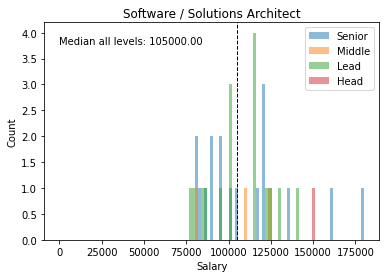

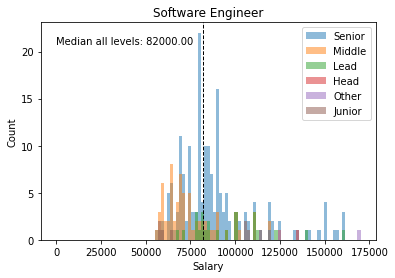

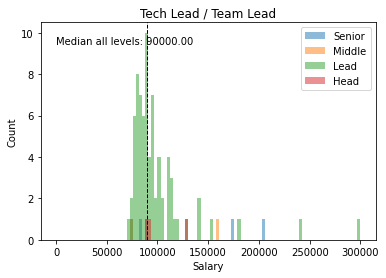

In [11]:
for position_name, df_position in dict_positions.items():
    bins = np.linspace(0, df_position['total'].max(), 100)
    
    # plot for each level if there is data
    for level in df['level'].unique():
        level_totals = df_position[df_position['level'] == level]['total']
        if not level_totals.empty:
            plt.hist(level_totals, bins, alpha=0.5, label=level)
    
    # show median
    median_total = df_position['total'].median()
    plt.axvline(median_total, color='k', linestyle='dashed', linewidth=1)
    _, max_ylim = plt.ylim()
    plt.text(0, max_ylim*0.9, 'Median all levels: {:.2f}'.format(median_total))

    plt.title(position_name)
    plt.xlabel('Salary')
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()